In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For text processing and feature scaling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [5]:
# 1. Data Ingestion & Initial Inspection
# Load the dataset (the file is named 'used_cars.csv')
df = pd.read_csv('usedCars.csv')

# Standardize column names to lowercase for consistency
df.columns = df.columns.str.lower()
# Print basic information about the dataset
print("Dataset Shape:", df.shape)
print("First 5 Rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nStatistical Summary for Numerical Features:")
print(df.describe())

Dataset Shape: (1064, 19)
First 5 Rows:
       id        company               model           variant fueltype  \
0  555675  MARUTI SUZUKI  CELERIO(2017-2019)     1.0 ZXI AMT O   PETROL   
1  556383  MARUTI SUZUKI                ALTO               LXI   PETROL   
2  556422        HYUNDAI           GRAND I10    1.2 KAPPA ASTA   PETROL   
3  556771           TATA               NEXON           XT PLUS   PETROL   
4  559619           FORD                FIGO  EXI DURATORQ 1.4   DIESEL   

   colour  kilometer  bodystyle transmissiontype manufacturedate  modelyear  \
0  Silver      33197  HATCHBACK              NaN      01-02-2018       2018   
1     Red      10322  HATCHBACK           Manual      01-03-2021       2021   
2    Grey      37889  HATCHBACK           Manual      01-03-2015       2015   
3    Blue      13106  HATCHBACK              NaN      01-08-2020       2020   
4  Silver     104614  HATCHBACK           Manual      01-11-2010       2010   

  cngkit       price      owner de

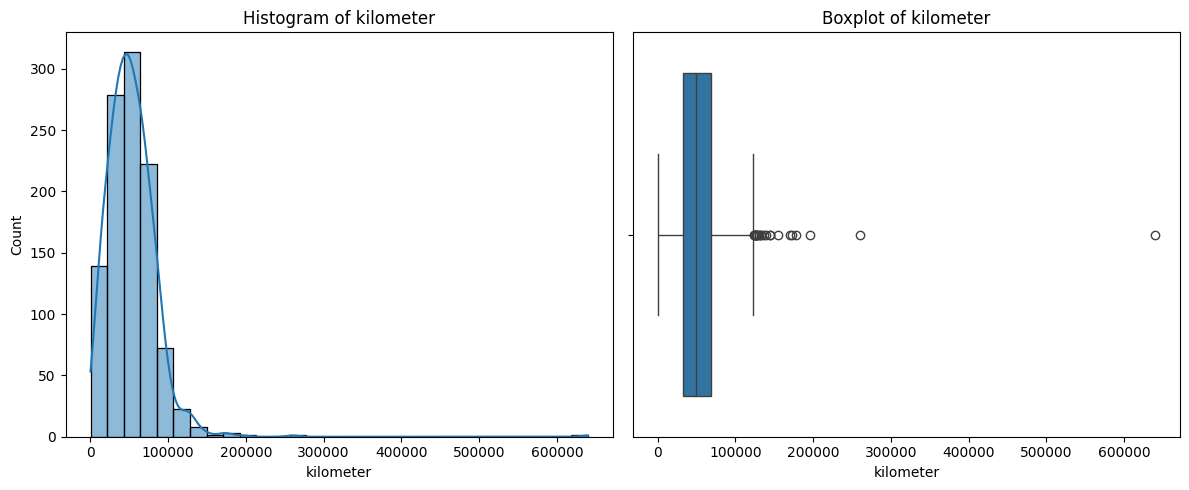

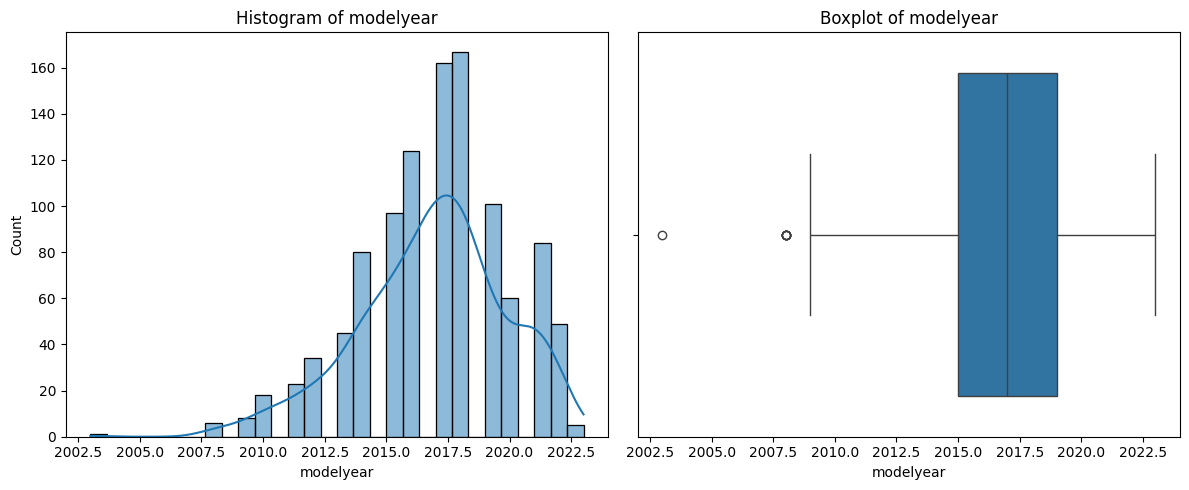

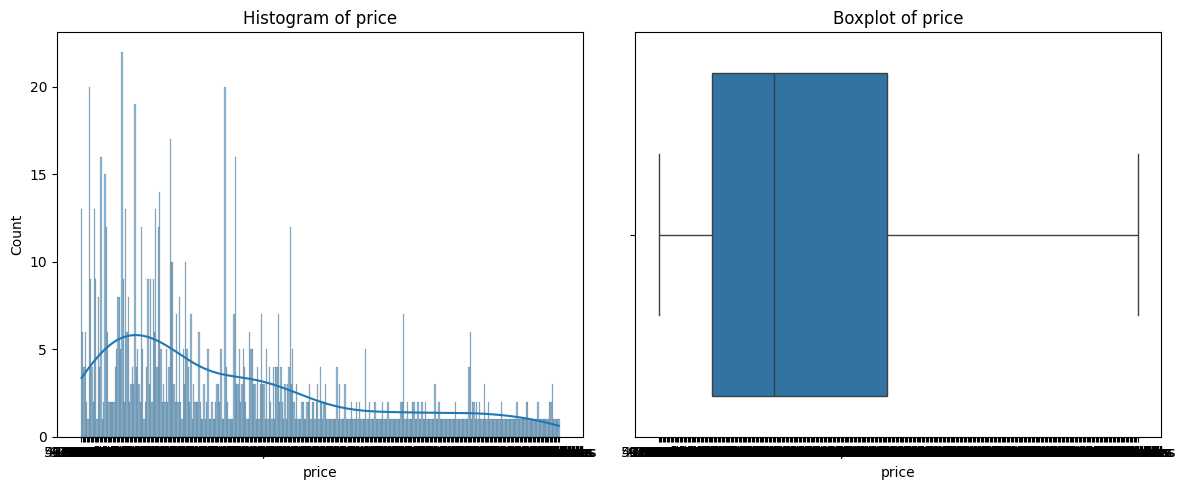

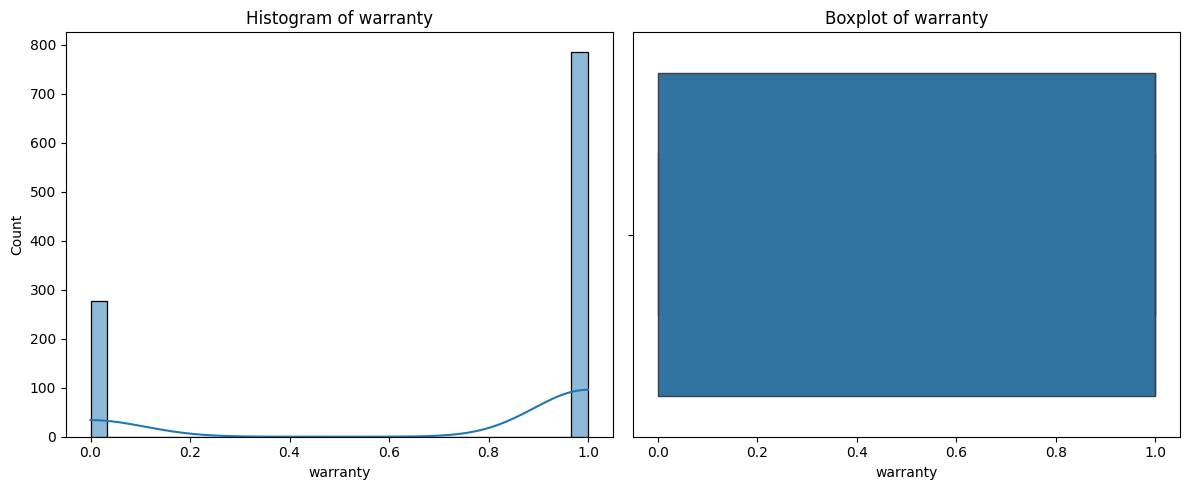

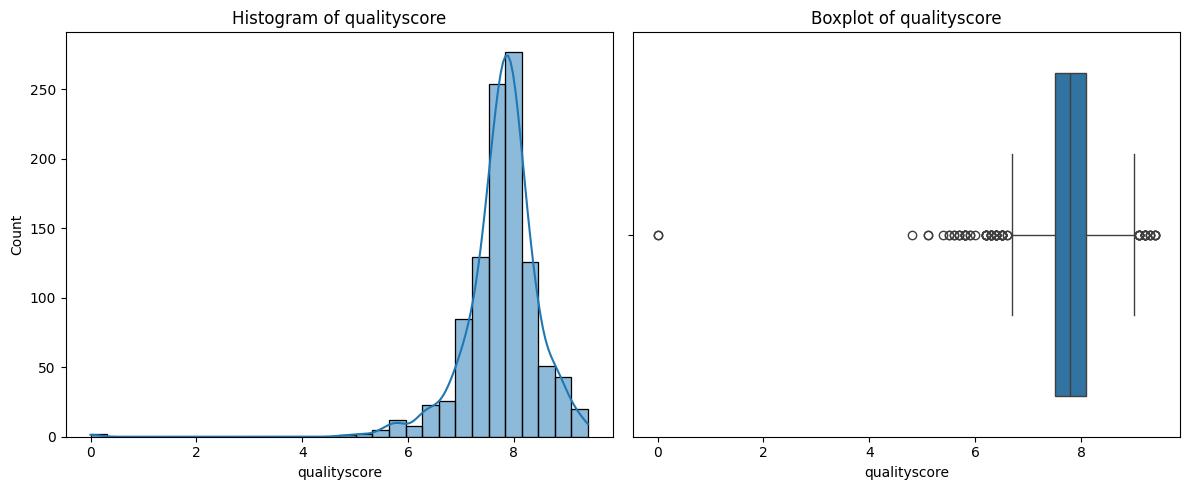

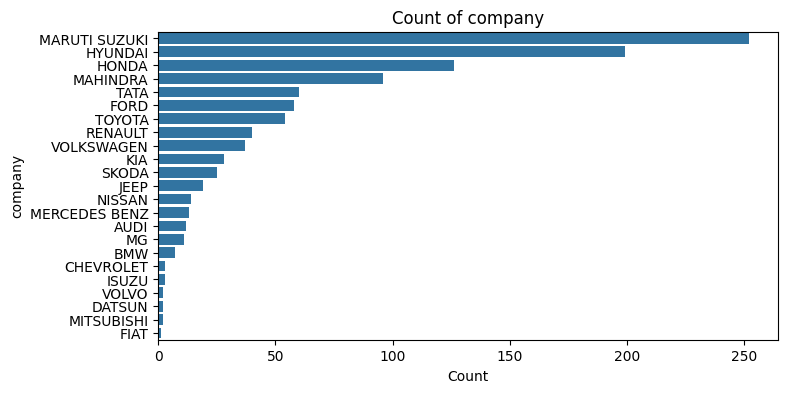

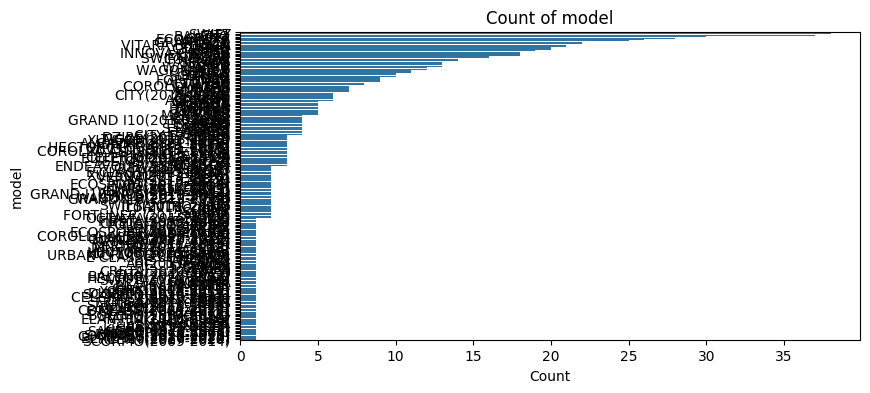

) missing from font(s) DejaVu Sans.n\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


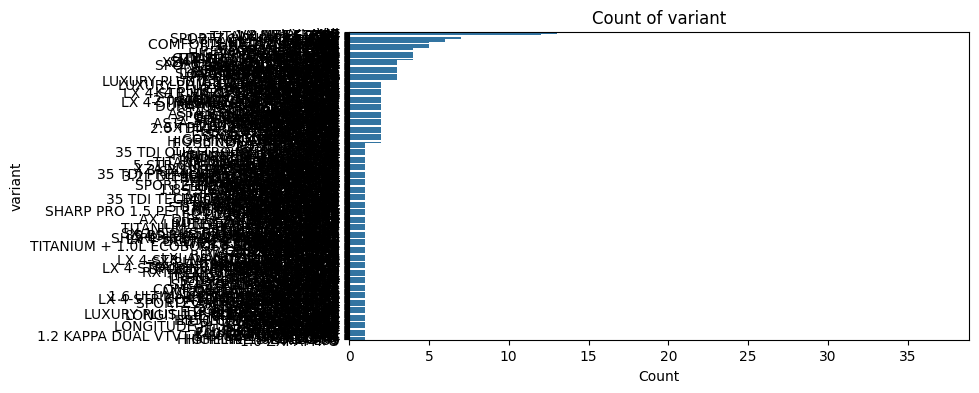

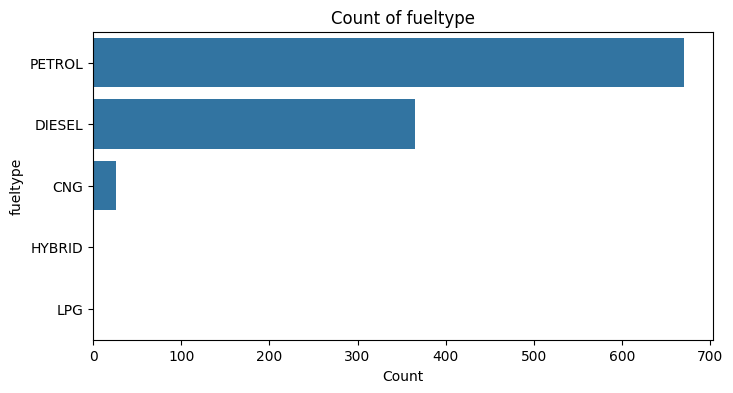

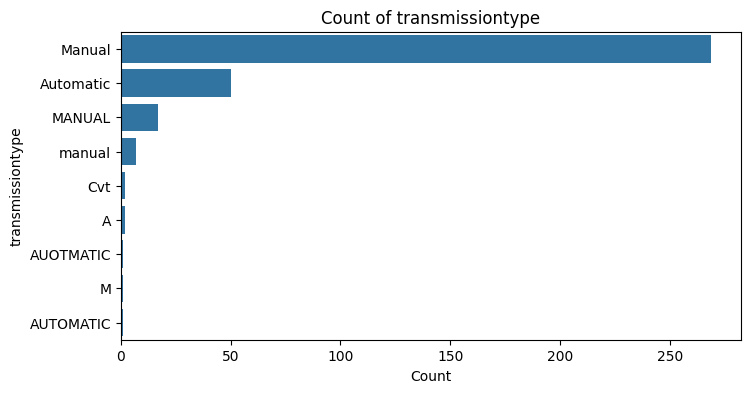

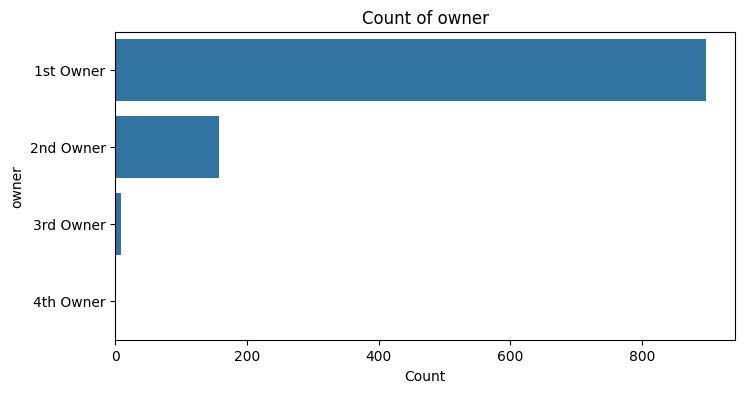

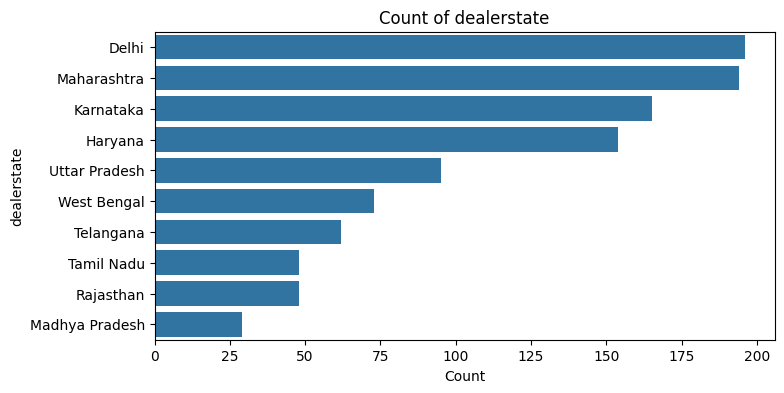

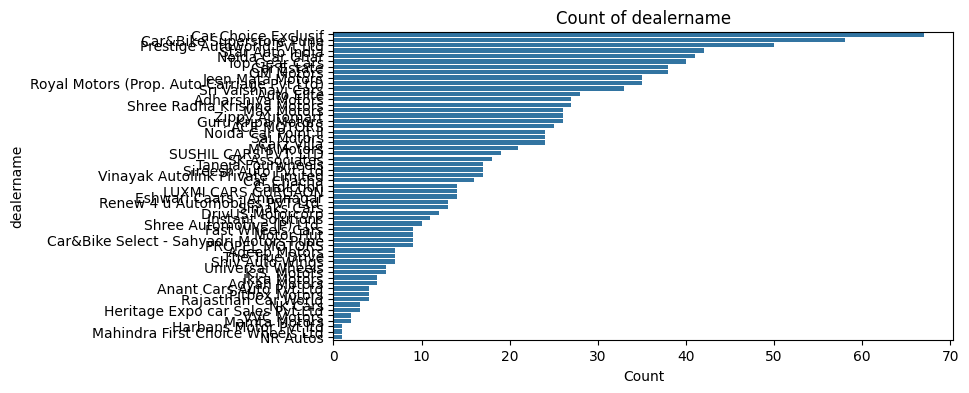

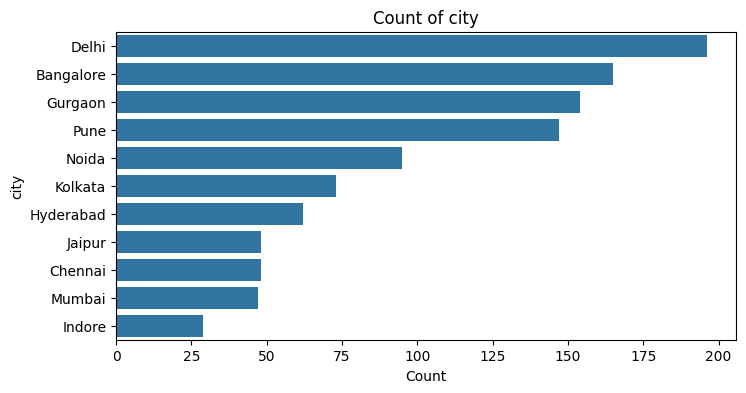

In [6]:
# 2. Exploratory Data Analysis (EDA)
# Define a list of key numerical features for visualization
numerical_features = ['kilometer', 'modelyear', 'price', 'warranty', 'qualityscore']

# Loop through each numerical feature to plot its distribution and detect potential issues
for feature in numerical_features:
    plt.figure(figsize=(12, 5))
    
    # Histogram with density plot
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    
    # Boxplot for spotting outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature].dropna())
    plt.title(f'Boxplot of {feature}')
    
    plt.tight_layout()
    plt.show()

# For categorical features, display the count of unique values
categorical_features = ['company', 'model', 'variant', 'color', 'fueltype', 'bodstyle', 'transmissiontype', 'owner', 'dealerstate', 'dealername', 'city']
for feature in categorical_features:
    if feature in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[feature], order=df[feature].value_counts().index)
        plt.title(f'Count of {feature}')
        plt.xlabel('Count')
        plt.ylabel(feature)
        plt.show()

In [7]:
# 3. Data Cleaning
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Impute missing values for numerical columns using the median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"Filled missing values in {col} with median value {median_value}")

# Impute missing values for categorical columns using a placeholder value (e.g., 'Unknown')
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna('Unknown', inplace=True)
    print(f"Filled missing values in {col} with 'Unknown'")



Missing Values per Column:
id                     0
company                0
model                  0
variant                0
fueltype               1
colour                 0
kilometer              0
bodystyle              0
transmissiontype     714
manufacturedate        0
modelyear              0
cngkit              1042
price                  0
owner                  0
dealerstate            0
dealername             0
city                   0
warranty               0
qualityscore           0
dtype: int64
Filled missing values in id with median value 572753.0
Filled missing values in kilometer with median value 49432.0
Filled missing values in modelyear with median value 2017.0
Filled missing values in warranty with median value 1.0
Filled missing values in qualityscore with median value 7.8
Filled missing values in company with 'Unknown'
Filled missing values in model with 'Unknown'
Filled missing values in variant with 'Unknown'
Filled missing values in fueltype with 'Unknown'
F

C:\Users\dell\AppData\Local\Temp\ipykernel_2988\2618136460.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_2988\2618136460.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [8]:
# 4. Outlier Detection & Treatment
# Function to remove outliers using the IQR method
# Cap the outliers instead of removing them
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(series, lower_bound, upper_bound)

# Apply capping to the original dataframe (choose one approach based on your needs)
if 'price' in df.columns:
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['price'] = cap_outliers(df['price'])
if 'kilometer' in df.columns:
    df['kilometer'] = cap_outliers(df['kilometer'])

In [9]:
# 5. Feature Engineering
# a. Categorical Encoding: One-hot encoding for categorical features
# List the features you wish to encode (ensure these columns exist in your dataset)
categorical_features_to_encode = ['fuel_type', 'bodystyle', 'transmissiontype', 'cngkit', 'owner', ]
existing_cat_features = [col for col in categorical_features_to_encode if col in df.columns]
df_encoded = pd.get_dummies(df, columns=existing_cat_features, drop_first=True)

# b. Normalization & Scaling: Scale numerical features so that they contribute equally
# Define the numerical features to scale: include derived 'car_age'
scale_cols = ['price', 'kilometer', 'warranty', 'qualityscore']
existing_scale_cols = [col for col in scale_cols if col in df_encoded.columns]
scaler = StandardScaler()
df_encoded[existing_scale_cols] = scaler.fit_transform(df_encoded[existing_scale_cols])

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [10]:
# 6. Final Overview
print("\nFinal preprocessed dataset preview:")
print(df_encoded.head())
print("Final dataset shape:", df_encoded.shape)

# At this point, df_encoded is a clean and feature-rich DataFrame ready for model training.
# You can now proceed to build your classification and recommendation models.


Final preprocessed dataset preview:
       id        company               model           variant fueltype  \
0  555675  MARUTI SUZUKI  CELERIO(2017-2019)     1.0 ZXI AMT O   PETROL   
1  556383  MARUTI SUZUKI                ALTO               LXI   PETROL   
2  556422        HYUNDAI           GRAND I10    1.2 KAPPA ASTA   PETROL   
3  556771           TATA               NEXON           XT PLUS   PETROL   
4  559619           FORD                FIGO  EXI DURATORQ 1.4   DIESEL   

   colour  kilometer manufacturedate  modelyear  price  ...  \
0  Silver  -0.692907      01-02-2018       2018    NaN  ...   
1     Red  -1.542958      01-03-2021       2021    NaN  ...   
2    Grey  -0.518549      01-03-2015       2015    NaN  ...   
3    Blue  -1.439502      01-08-2020       2020    NaN  ...   
4  Silver   1.960999      01-11-2010       2010    NaN  ...   

  transmissiontype_M transmissiontype_MANUAL transmissiontype_Manual  \
0              False                   False                 

In [11]:
df_encoded.to_csv('preprocess_used_cars.csv', index=False)